# Linear Regression Explained 📊

***

### What is Linear Regression?

* A **supervised machine learning algorithm** for predicting a **continuous output variable** based on **one or more input variables**.
* The primary goal is to find a **linear equation** that best represents the relationship between the variables.

---

### Types of Linear Regression

* **Simple Linear Regression**
    * Uses **one independent variable** ($x$) to predict a **dependent variable** ($y$).
    * Formula: $y = mx + c$
    * $y$: predicted dependent variable
    * $x$: independent variable
    * $m$: **slope** (how $y$ changes with $x$)
    * $c$: **y-intercept** (value of $y$ when $x=0$)

* **Multiple Linear Regression**
    * Uses **two or more independent variables** ($x_1, \dots, x_n$) to predict a **dependent variable** ($y$).
    * Formula: $y = c + m_1x_1 + m_2x_2 + \dots + m_nx_n$
    * $y$: predicted dependent variable
    * $x_1, \dots, x_n$: independent variables
    * $c$: y-intercept
    * $m_1, \dots, m_n$: **coefficients** (slopes for each independent variable)

---

### How It Works

* The algorithm fits a line by minimizing the **sum of squared errors**.
* This is known as the **Ordinary Least Squares (OLS)** method.
* The **squared error** is the vertical distance between a data point and the regression line. By minimizing this, the line of best fit is found.

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=pd.read_csv(r"G:\Docs\Macchine Learning\Linear Regression\Linear Regression1.csv")
print(df.head())


         Age  Annual_Income  Years_Experience  Gender  Satisfaction_Rating  \
0  34.981605   92834.554262          1.851329       1             3.141241   
1  58.028572   78248.672971          5.419009       1             1.860807   
2  49.279758   57857.485466          8.729458       1             1.048483   
3  43.946339  103241.551774          7.322249       1             1.964806   
4  26.240746   91625.805530          8.065611       0             4.903495   

   Spending_Score  
0    41374.419450  
1    28965.477008  
2    25642.706534  
3    45032.263369  
4    44866.111696  


In [6]:
x=df[["Age","Annual_Income","Years_Experience","Gender","Satisfaction_Rating"]]
y=df["Spending_Score"]

x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.4,  random_state=42)
x_val, x_test, y_val, y_test= train_test_split(x_temp, y_temp, test_size=0.5,  random_state=42)
print(f"Train shape: {x_train.shape}, Validation shape: {x_val.shape}, Test shape: {x_test.shape}")

Train shape: (300, 5), Validation shape: (100, 5), Test shape: (100, 5)


In [7]:
LinReg_Model= LinearRegression()
LinReg_Model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=LinReg_Model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 27594724.36863455
Mean Absolute Error: 4093.8055347512914
R2 Score: 0.8202336039444184


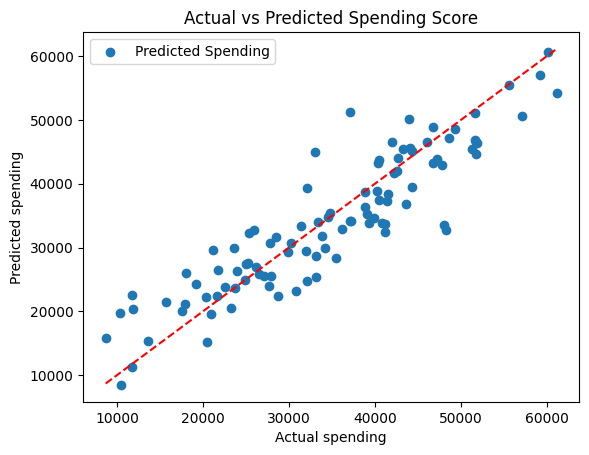

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual spending")
plt.ylabel("Predicted spending")
plt.title("Actual vs Predicted Spending Score")
plt.legend(["Predicted Spending"])
plt.show()